# Classification 

## Heart Failure Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('D:\Visual Studio\Dataset Tugas MBC\Week 4\Classification\heart_failure.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


<>:1: SyntaxWarning: invalid escape sequence '\V'
<>:1: SyntaxWarning: invalid escape sequence '\V'
C:\Users\Rudi Firdaus\AppData\Local\Temp\ipykernel_9612\2293656658.py:1: SyntaxWarning: invalid escape sequence '\V'
  df = pd.read_csv('D:\Visual Studio\Dataset Tugas MBC\Week 4\Classification\heart_failure.csv')


In [3]:
df.tail(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
908,63,M,ASY,140,187,0,LVH,144,Y,4.0,Up,1
909,63,F,ASY,124,197,0,Normal,136,Y,0.0,Flat,1
910,41,M,ATA,120,157,0,Normal,182,N,0.0,Up,0
911,59,M,ASY,164,176,1,LVH,90,N,1.0,Flat,1
912,57,F,ASY,140,241,0,Normal,123,Y,0.2,Flat,1
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [32]:
df['Age'].min()

28

In [5]:
df.duplicated().sum(), df.isna().sum()

(0,
 Age               0
 Sex               0
 ChestPainType     0
 RestingBP         0
 Cholesterol       0
 FastingBS         0
 RestingECG        0
 MaxHR             0
 ExerciseAngina    0
 Oldpeak           0
 ST_Slope          0
 HeartDisease      0
 dtype: int64)

In [6]:
df['FastingBS'].unique()

array([0, 1], dtype=int64)

In [7]:
num_cols = [var for var in df.columns if df[var].dtype != 'O']
num_cols

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'HeartDisease']

In [8]:
cat_cols = [var for var in df.columns if df[var].dtype == 'O']
cat_cols

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [9]:
for cols in cat_cols:
    print(f'Kolom: {cols}')
    print(f'Value Count: {df[cols].value_counts()}')
    print('-'*50)

Kolom: Sex
Value Count: Sex
M    725
F    193
Name: count, dtype: int64
--------------------------------------------------
Kolom: ChestPainType
Value Count: ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64
--------------------------------------------------
Kolom: RestingECG
Value Count: RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64
--------------------------------------------------
Kolom: ExerciseAngina
Value Count: ExerciseAngina
N    547
Y    371
Name: count, dtype: int64
--------------------------------------------------
Kolom: ST_Slope
Value Count: ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64
--------------------------------------------------


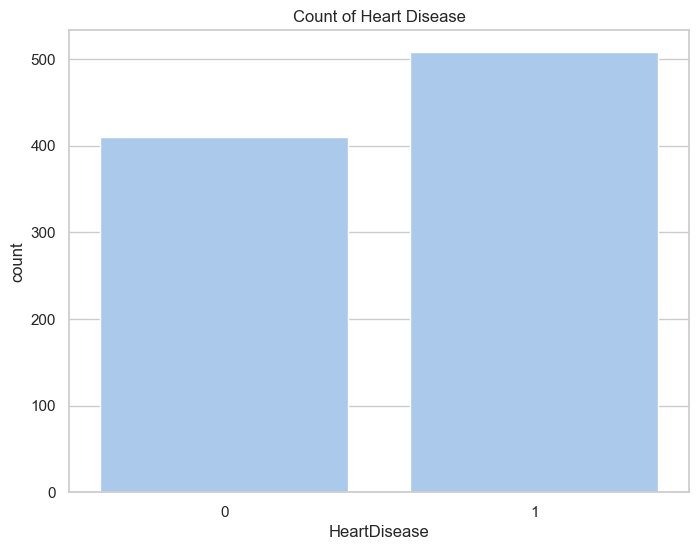

In [10]:
sns.set(style="whitegrid", palette="pastel")

plt.figure(figsize=(8, 6))
plt.title('Count of Heart Disease')
sns.countplot(x='HeartDisease', data=df)
plt.show()

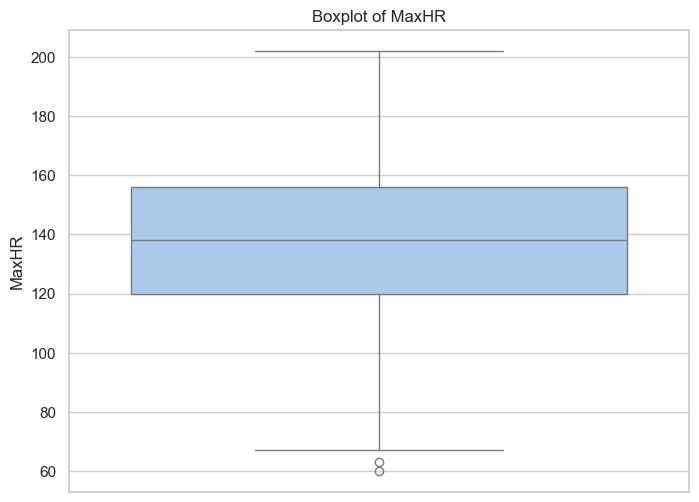

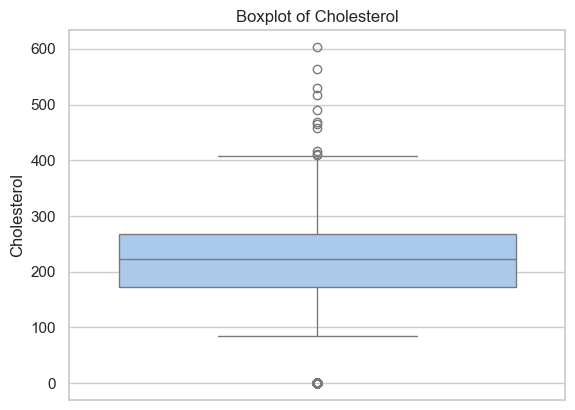

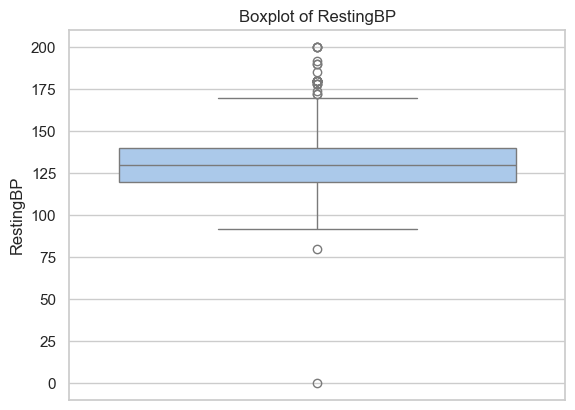

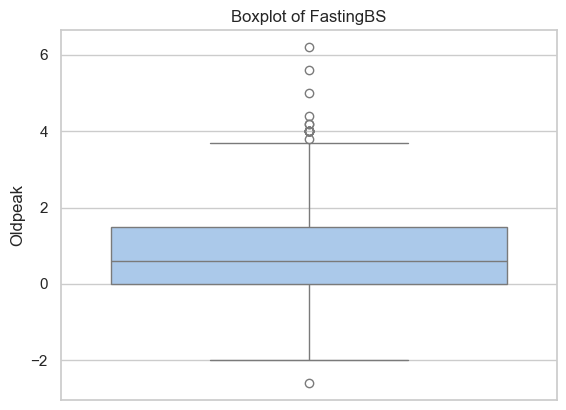

In [11]:
plt.figure(figsize=(8, 6))
plt.title('Boxplot of MaxHR')
sns.boxplot(y='MaxHR', data=df)
plt.show()

plt.title('Boxplot of Cholesterol')
sns.boxplot(y='Cholesterol', data=df)
plt.show()

plt.title('Boxplot of RestingBP')
sns.boxplot(y='RestingBP', data=df)
plt.show()

plt.title('Boxplot of FastingBS')
sns.boxplot(y='Oldpeak', data=df)
plt.show()

In [12]:
corr = df[num_cols].corr()
corr

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


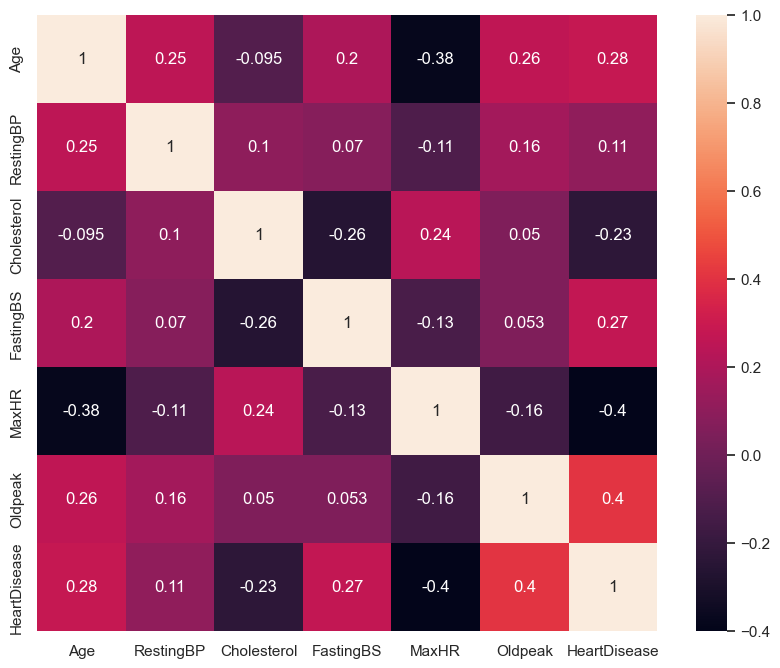

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True)
plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

cols =  ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
for col in cols:
  df[col] = label_encoder.fit_transform(df[col])

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [15]:
df.tail(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
908,63,1,0,140,187,0,0,144,1,4.0,2,1
909,63,0,0,124,197,0,1,136,1,0.0,1,1
910,41,1,1,120,157,0,1,182,0,0.0,2,0
911,59,1,0,164,176,1,0,90,0,1.0,1,1
912,57,0,0,140,241,0,1,123,1,0.2,1,1
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1
917,38,1,2,138,175,0,1,173,0,0.0,2,0


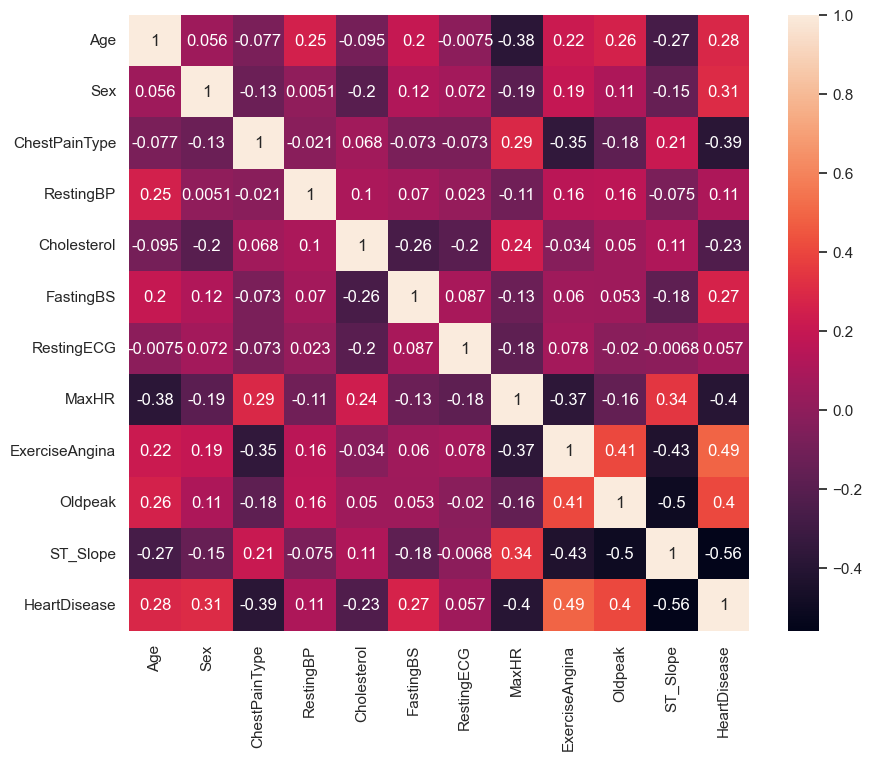

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [17]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

x = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

x_train.shape, x_test.shape

((688, 11), (230, 11))

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [19]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier(random_state=0)
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9]
}
grid_search_xgb = GridSearchCV(estimator=model_xgb, param_grid=param_grid_xgb, cv=5, scoring='accuracy')
grid_search_xgb.fit(x_train, y_train)

best_xgb = grid_search_xgb.best_estimator_
best_params_xgb = grid_search_xgb.best_params_
best_score_xgb = grid_search_xgb.best_score_

y_pred_xgb = best_xgb.predict(x_test)

print("XGBoost:")
print("Best parameters:", best_params_xgb)
print("Best accuracy score:", best_score_xgb)
print("Best accuracy score:", grid_search_xgb.score(x_test, y_test))

XGBoost:
Best parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}
Best accuracy score: 0.8720512006770337
Best accuracy score: 0.8434782608695652


In [20]:
# predicting using random forest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

model_rf = RandomForestClassifier(random_state=0)
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}
grid_search_rf = GridSearchCV(estimator=model_rf, param_grid=param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(x_train, y_train)

best_rf = grid_search_rf.best_estimator_
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

y_pred_rfr_test = best_rf.predict(x_test)
y_pred_rfr_train = best_rf.predict(x_train)

print("Random Forest:")
print("Best parameters:", best_params_rf)
#print("Best accuracy score:", best_score_rf)
#print("Best accuracy score:", grid_search_rf.score(x_test, y_test))
print(accuracy_score(y_train, y_pred_rfr_train))

print(accuracy_score(y_test, y_pred_rfr_test))

Random Forest:
Best parameters: {'max_depth': None, 'n_estimators': 200}
1.0
0.8521739130434782


In [21]:
from sklearn.naive_bayes import GaussianNB

classifier_nb = GaussianNB()
classifier_nb.fit(x_train, y_train)
y_pred_nb = classifier_nb.predict(x_test)

print(f'Model accuracy score on train set: {classifier_nb.score(x_train, y_train)}')
print(f'Model accuracy score on test set: {classifier_nb.score(x_test, y_test)}')

Model accuracy score on train set: 0.8619186046511628
Model accuracy score on test set: 0.8478260869565217


In [22]:
from sklearn.metrics import confusion_matrix

cm_xgb = confusion_matrix(y_test, y_pred_xgb)
cm_rfr = confusion_matrix(y_test, y_pred_rfr_test)
cm_nb = confusion_matrix(y_test, y_pred_nb)

print('XGBoost confusion matrix\n\n', cm_xgb)
print('\n\nRandom Forest confusion matrix\n\n', cm_rfr)
print('\n\nNaive Bayes confusion matrix\n\n', cm_nb)

XGBoost confusion matrix

 [[ 70  22]
 [ 14 124]]


Random Forest confusion matrix

 [[ 73  19]
 [ 15 123]]


Naive Bayes confusion matrix

 [[ 73  19]
 [ 16 122]]


In [23]:
# Classification report
from sklearn.metrics import classification_report

# For XGB Model
print('Classification report (XGB Model): \n')
print(classification_report(y_test, y_pred_xgb))

# For Random Forest Model
print('Classification report (Random Forest Model): \n')
print(classification_report(y_test, y_pred_rfr))

print('Classification report (Gaussian Naive Bayes): \n')
print(classification_report(y_test, y_pred_nb))

Classification report (XGB Model): 

              precision    recall  f1-score   support

           0       0.83      0.76      0.80        92
           1       0.85      0.90      0.87       138

    accuracy                           0.84       230
   macro avg       0.84      0.83      0.83       230
weighted avg       0.84      0.84      0.84       230

Classification report (Random Forest Model): 



NameError: name 'y_pred_rfr' is not defined

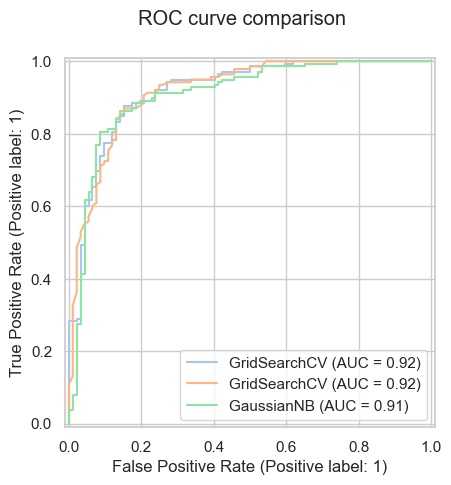

In [ ]:
from sklearn import metrics

xgb_disp = metrics.RocCurveDisplay.from_estimator(grid_search_xgb, x_test, y_test)
rf_disp = metrics.RocCurveDisplay.from_estimator(grid_search_rf, x_test, y_test, ax=xgb_disp.ax_)
nb_disp = metrics.RocCurveDisplay.from_estimator(classifier_nb, x_test, y_test, ax=xgb_disp.ax_)

# Plot title
rf_disp.figure_.suptitle("ROC curve comparison")
plt.show()


In [ ]:
import pickle

with open("model_classifier.pkl", "wb") as model_classifier:
  pickle.dump(grid_search_rf, model_classifier)

In [ ]:
with open("scaler.pkl", "wb") as f:
  pickle.dump(scaler, f)